In [ ]:
# Import libraries
import numpy as np
import matplotlib
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split
)
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path= input('Input dataset file path here:')

Input dataset file path here:/content/Airline_review.csv


## **STEP 1: EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:

# Import Airline Reviews csv dataset as a dataframe
airline_reviews = pd.read_csv(file_path)
airline_reviews.drop('Unnamed: 0', axis=1, inplace=True)

print('airline_reviews shape:')
display(airline_reviews.shape)

print('airline_reviews head:')
display(airline_reviews.head())

print('airline_reviews unique value count:')
display(airline_reviews.nunique())

print('airline_reviews null value count:')
display(airline_reviews.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews.dtypes)

print(f"Class Distribution: {airline_reviews['Recommended'].value_counts()}")

airline_reviews shape:


(23171, 19)

airline_reviews head:


Airline Name Overall_Rating                           Review_Title  \
0    AB Aviation              9                "pretty decent airline"   
1    AB Aviation              1                   "Not a good airline"   
2    AB Aviation              1         "flight was fortunately short"   
3  Adria Airways              1    "I will never fly again with Adria"   
4  Adria Airways              1  "it ruined our last days of holidays"   

           Review Date  Verified  \
0   11th November 2019      True   
1       25th June 2019      True   
2       25th June 2019      True   
3  28th September 2019     False   
4  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an...  Embraer E120    
3    Please do a favor yourself and do not fly wi...            NaN   
4   Do not book a flight with this airline! My fr...            NaN   

  Type Of Traveller      Seat Type                             Route  \
0      Solo Leisure  Economy Class                  Moroni to Moheli   
1      Solo Leisure  Economy Class                 Moroni to Anjouan   
2      Solo Leisure  Economy Class               Anjouan to Dzaoudzi   
3      Solo Leisure  Economy Class             Frankfurt to Pristina   
4    Couple Leisure  Economy Class  Sofia to Amsterdam via Ljubljana   

       Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0   November 2019           4.0                  5.0               4.0   
1       June 2019           2.0                  2.0               1.0   
2       June 2019           2.0                  1.0               1.0   
3  September 2019           1.0                  1.0               NaN   
4  September 2019           1.0                  1.0               1.0   

   Ground Service  Inflight Entertainment  Wifi & Connectivity  \
0             4.0                     NaN                  NaN   
1             1.0                     NaN                  NaN   
2             1.0                     NaN                  NaN   
3             1.0                     NaN                  NaN   
4             1.0                     1.0                  1.0   

   Value For Money Recommended  
0              3.0         yes  
1              2.0          no  
2              2.0          no  
3              1.0          no  
4              1.0          no

airline_reviews unique value count:


Airline Name                497
Overall_Rating               10
Review_Title              17219
Review Date                4557
Verified                      2
Review                    23046
Aircraft                   1048
Type Of Traveller             4
Seat Type                     4
Route                     13607
Date Flown                  109
Seat Comfort                  6
Cabin Staff Service           6
Food & Beverages              6
Ground Service                5
Inflight Entertainment        6
Wifi & Connectivity           6
Value For Money               6
Recommended                   2
dtype: int64

airline_reviews null value count:


Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

airline_reviews rows w/ null value count:


0         True
1         True
2         True
3         True
4         True
         ...  
23166     True
23167     True
23168     True
23169    False
23170     True
Length: 23171, dtype: bool

airline_reviews data types:


Airline Name               object
Overall_Rating             object
Review_Title               object
Review Date                object
Verified                     bool
Review                     object
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                object
dtype: object

Class Distribution: Recommended
no     15364
yes     7807
Name: count, dtype: int64


In [ ]:
df = airline_reviews.copy()
df.head()

Airline Name Overall_Rating                           Review_Title  \
0    AB Aviation              9                "pretty decent airline"   
1    AB Aviation              1                   "Not a good airline"   
2    AB Aviation              1         "flight was fortunately short"   
3  Adria Airways              1    "I will never fly again with Adria"   
4  Adria Airways              1  "it ruined our last days of holidays"   

           Review Date  Verified  \
0   11th November 2019      True   
1       25th June 2019      True   
2       25th June 2019      True   
3  28th September 2019     False   
4  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an...  Embraer E120    
3    Please do a favor yourself and do not fly wi...            NaN   
4   Do not book a flight with this airline! My fr...            NaN   

  Type Of Traveller      Seat Type                             Route  \
0      Solo Leisure  Economy Class                  Moroni to Moheli   
1      Solo Leisure  Economy Class                 Moroni to Anjouan   
2      Solo Leisure  Economy Class               Anjouan to Dzaoudzi   
3      Solo Leisure  Economy Class             Frankfurt to Pristina   
4    Couple Leisure  Economy Class  Sofia to Amsterdam via Ljubljana   

       Date Flown  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0   November 2019           4.0                  5.0               4.0   
1       June 2019           2.0                  2.0               1.0   
2       June 2019           2.0                  1.0               1.0   
3  September 2019           1.0                  1.0               NaN   
4  September 2019           1.0                  1.0               1.0   

   Ground Service  Inflight Entertainment  Wifi & Connectivity  \
0             4.0                     NaN                  NaN   
1             1.0                     NaN                  NaN   
2             1.0                     NaN                  NaN   
3             1.0                     NaN                  NaN   
4             1.0                     1.0                  1.0   

   Value For Money Recommended  
0              3.0         yes  
1              2.0          no  
2              2.0          no  
3              1.0          no  
4              1.0          no

**Key Columns Descriptions:**
*   Airline Name: Name of the airline.
*   Overall_Rating: General rating given to the airline.
*   Review_Title: Title of the review.
*   Review Date: Date the review was posted.
*   Verified: Whether the review is verified.
*   Review: Text of the review.
*   Aircraft: Aircraft type (sparse data).
*   Type Of Traveller: E.g., solo leisure, business.
*   Seat Type: Cabin type (e.g., Economy, Business).
*   Route: Flight route (origin-destination pair).
*   Date Flown: When the flight occurred.
*   Ratings (various aspects, on a scale of 1.0 - 5.0):
  *   Seat Comfort
  *   Cabin Staff Service
  *   Food & Beverages
  *   Ground Service
  *   Inflight Entertainment
  *   Wifi & Connectivity
  *   Value For Money
*   Recommended: Whether the reviewer recommends the airline.


## **MODEL 1.9: DECISION TREE BENCHMARK W/ MOST MINIMAL PREPROCESSING**

In [ ]:
airline_reviews_dtbm = pd.read_csv(file_path)
airline_reviews_dtbm.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews_dtbm.drop('Airline Name', axis=1, inplace=True)
airline_reviews_dtbm.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews_dtbm.drop('Review_Title', axis=1, inplace=True)
airline_reviews_dtbm.drop('Review Date', axis=1, inplace=True)
airline_reviews_dtbm.drop('Review', axis=1, inplace=True)
airline_reviews_dtbm.drop('Aircraft', axis=1, inplace=True)
airline_reviews_dtbm.drop('Route', axis=1, inplace=True)
airline_reviews_dtbm.drop('Date Flown', axis=1, inplace=True)
# airline_reviews_dtbm.drop('Verified', axis = 1, inplace = True)

In [ ]:
# """
# 2. Transform null values if applicable
# Many reviews will have null values in rating columns where the reviewer may
# have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

# If there is a null rating, just set it to "3.0")
# """

# airline_reviews_dtbm['Seat Comfort'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Cabin Staff Service'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Food & Beverages'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Ground Service'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Inflight Entertainment'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Wifi & Connectivity'].fillna(3.0, inplace=True)

In [ ]:
# """
# 3. Drop all rows with null values
# """

# airline_reviews_dtbm.dropna(inplace=True)
# airline_reviews_dtbm.reset_index(inplace=True)

In [ ]:
"""
Transform the values in 'Type Of Traveller' column as:
'Solo Leisure': 0
'Couple Leisure': 1
'Business': 2
'Family Leisure': 3

Transform the values in 'Seat Type' column as:
'Economy Class': 0
'Business Class': 1
'Premium Economy': 2
'First Class': 3

"""
# airline_reviews_dtbm = airline_reviews.copy()
airline_reviews_dtbm['Type Of Traveller'] = airline_reviews_dtbm['Type Of Traveller'].map({
    'Solo Leisure': 0.0,
    'Couple Leisure': 1.0,
    'Business': 2.0,
    'Family Leisure': 3.0
})

airline_reviews_dtbm['Seat Type'] = airline_reviews_dtbm['Seat Type'].map({
    'Economy Class': 0.0,
    'Business Class': 1.0,
    'Premium Economy': 2.0,
    'First Class': 3.0
})

In [ ]:
"""
5. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews_dtbm['Recommended'] = airline_reviews_dtbm['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
"""
Evaluating post-processed dataset.
"""
# airline_reviews_rfbm.drop('index', axis=1, inplace=True)
airline_reviews_dtbm.reset_index()

print('airline_reviews shape:')
display(airline_reviews_dtbm.shape)

print('airline_reviews head:')
display(airline_reviews_dtbm.head())

print('airline_reviews unique value count:')
display(airline_reviews_dtbm.nunique())

print('airline_reviews null value count:')
display(airline_reviews_dtbm.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews_dtbm.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews_dtbm.dtypes)

print(f"Class Distribution: {airline_reviews_dtbm['Recommended'].value_counts() / len(airline_reviews_dtbm['Recommended'])}")

airline_reviews shape:


(23171, 11)

airline_reviews head:


Verified  Type Of Traveller  Seat Type  Seat Comfort  Cabin Staff Service  \
0      True                0.0        0.0           4.0                  5.0   
1      True                0.0        0.0           2.0                  2.0   
2      True                0.0        0.0           2.0                  1.0   
3     False                0.0        0.0           1.0                  1.0   
4      True                1.0        0.0           1.0                  1.0   

   Food & Beverages  Ground Service  Inflight Entertainment  \
0               4.0             4.0                     NaN   
1               1.0             1.0                     NaN   
2               1.0             1.0                     NaN   
3               NaN             1.0                     NaN   
4               1.0             1.0                     1.0   

   Wifi & Connectivity  Value For Money  Recommended  
0                  NaN              3.0            1  
1                  NaN              2.0            0  
2                  NaN              2.0            0  
3                  NaN              1.0            0  
4                  1.0              1.0            0

airline_reviews unique value count:


Verified                  2
Type Of Traveller         4
Seat Type                 4
Seat Comfort              6
Cabin Staff Service       6
Food & Beverages          6
Ground Service            5
Inflight Entertainment    6
Wifi & Connectivity       6
Value For Money           6
Recommended               2
dtype: int64

airline_reviews null value count:


Verified                      0
Type Of Traveller          3738
Seat Type                  1096
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

airline_reviews rows w/ null value count:


0         True
1         True
2         True
3         True
4        False
         ...  
23166     True
23167     True
23168     True
23169    False
23170     True
Length: 23171, dtype: bool

airline_reviews data types:


Verified                     bool
Type Of Traveller         float64
Seat Type                 float64
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                 int64
dtype: object

Class Distribution: Recommended
0    0.66307
1    0.33693
Name: count, dtype: float64


In [ ]:
airline_reviews_dtbm.head()

Verified  Type Of Traveller  Seat Type  Seat Comfort  Cabin Staff Service  \
0      True                0.0        0.0           4.0                  5.0   
1      True                0.0        0.0           2.0                  2.0   
2      True                0.0        0.0           2.0                  1.0   
3     False                0.0        0.0           1.0                  1.0   
4      True                1.0        0.0           1.0                  1.0   

   Food & Beverages  Ground Service  Inflight Entertainment  \
0               4.0             4.0                     NaN   
1               1.0             1.0                     NaN   
2               1.0             1.0                     NaN   
3               NaN             1.0                     NaN   
4               1.0             1.0                     1.0   

   Wifi & Connectivity  Value For Money  Recommended  
0                  NaN              3.0            1  
1                  NaN              2.0            0  
2                  NaN              2.0            0  
3                  NaN              1.0            0  
4                  1.0              1.0            0

In [ ]:
# Split the dataset
X = airline_reviews_dtbm.drop('Recommended', axis=1)  # Features
y = airline_reviews_dtbm['Recommended']              # Target

# Split into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple decision tree for benchmarking
dtbm_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Minimal depth
dtbm_model.fit(X_train, y_train)
y_pred_dtbm = dtbm_model.predict(X_test)


In [ ]:
"""
Evaluating the Model
"""

accuracy = accuracy_score(y_pred_dtbm, y_test)
f1 = f1_score(y_pred_dtbm, y_test, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Stratified Accuracy
stratified_cv = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

stratified_scores = cross_val_score(dtbm_model, X_train, y_train, cv=stratified_cv, scoring='accuracy')

print('Cross-validated Stratified Score (Accuracy):', np.mean(stratified_scores))

Accuracy: 0.9344073647871116
F1 Score: 0.9342660371181055
Cross-validated Stratified Score (Accuracy): 0.9408717351104606


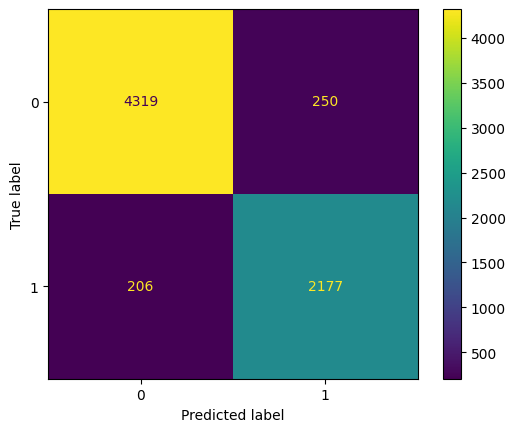

In [ ]:
# Confusion Matrix for Benchmark Model
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_dtbm, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
# def plot_confusionmatrix(y_train_pred_DTBM,y_train,dom):
#     print(f'{dom} Confusion matrix')
#     cf = confusion_matrix(y_train_pred_DTBM,y_train)
#     # When annot is set to True, it adds text annotations to each cell of the heatmap.
#     sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# #plot the confusion matrix
# classes = ['Presence','Absence']

# print(f'Train score {accuracy_score(y_train_pred_DTBM,X_train)}')
# print(f'Test score {accuracy_score(y_test_pred_DTBM,X_test)}')
# plot_confusionmatrix(y_train_pred_DTBM,X_train,dom='Train')
# plot_confusionmatrix(y_test_pred_DTBM,X_test,dom='Test')

## **MODEL 2: DECISION TREE W/ PREPROCESSING**


In [ ]:
airline_reviews_dt = pd.read_csv(file_path)
airline_reviews_dt.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews_dt.drop('Airline Name', axis=1, inplace=True)
airline_reviews_dt.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews_dt.drop('Review_Title', axis=1, inplace=True)
airline_reviews_dt.drop('Review Date', axis=1, inplace=True)
airline_reviews_dt.drop('Review', axis=1, inplace=True)
airline_reviews_dt.drop('Aircraft', axis=1, inplace=True)
airline_reviews_dt.drop('Route', axis=1, inplace=True)
airline_reviews_dt.drop('Date Flown', axis=1, inplace=True)

display(airline_reviews_dt.shape)

(23171, 11)

In [ ]:
"""
2. Drop all reviews that are not Verified
"""
airline_reviews_dt = airline_reviews_dt[airline_reviews_dt['Verified'] == True]
airline_reviews_dt.drop('Verified', axis=1, inplace=True) # Drop the column after subsetting

display(airline_reviews_dt.shape)

(12322, 10)

In [ ]:
"""
3. Transform null values if applicable
Many reviews will have null values in rating columns where the reviewer may
have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

If there is a null rating, just set it to "3.0")
"""

airline_reviews_dt['Seat Comfort'].fillna(3.0, inplace=True)
airline_reviews_dt['Cabin Staff Service'].fillna(3.0, inplace=True)
airline_reviews_dt['Food & Beverages'].fillna(3.0, inplace=True)
airline_reviews_dt['Ground Service'].fillna(3.0, inplace=True)
airline_reviews_dt['Inflight Entertainment'].fillna(3.0, inplace=True)
airline_reviews_dt['Wifi & Connectivity'].fillna(3.0, inplace=True)

display(airline_reviews_dt.shape)

<ipython-input-133-740c9ca7d1e9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline_reviews_dt['Seat Comfort'].fillna(3.0, inplace=True)
<ipython-input-133-740c9ca7d1e9>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

(12322, 10)

In [ ]:
"""
4. Drop all rows with null values
"""

airline_reviews_dt.dropna(inplace=True)
airline_reviews_dt.reset_index(inplace=True)

display(airline_reviews_dt.shape)

(12320, 11)

In [ ]:
"""
5. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews_dt['Recommended'] = airline_reviews_dt['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
"""
Transform the values in 'Type Of Traveller' column as:
'Solo Leisure': 0
'Couple Leisure': 1
'Business': 2
'Family Leisure': 3

Transform the values in 'Seat Type' column as:
'Economy Class': 0
'Business Class': 1
'Premium Economy': 2
'First Class': 3

"""

airline_reviews_dt['Type Of Traveller'] = airline_reviews_dt['Type Of Traveller'].map({
    'Solo Leisure': 0.0,
    'Couple Leisure': 1.0,
    'Business': 2.0,
    'Family Leisure': 3.0
})

airline_reviews_dt['Seat Type'] = airline_reviews_dt['Seat Type'].map({
    'Economy Class': 0.0,
    'Business Class': 1.0,
    'Premium Economy': 2.0,
    'First Class': 3.0
})

In [ ]:
"""
Evaluating post-processed dataset.
"""
airline_reviews_dt.drop('index', axis=1, inplace=True)
airline_reviews_dt.reset_index()

print('airline_reviews shape:')
display(airline_reviews_dt.shape)

print('airline_reviews head:')
display(airline_reviews_dt.head())

print('airline_reviews unique value count:')
display(airline_reviews_dt.nunique())

print('airline_reviews null value count:')
display(airline_reviews_dt.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews_dt.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews_dt.dtypes)

print(f"Class Distribution: {airline_reviews_dt['Recommended'].value_counts() / len(airline_reviews_dt['Recommended'])}")

airline_reviews shape:


(12320, 10)

airline_reviews head:


Type Of Traveller  Seat Type  Seat Comfort  Cabin Staff Service  \
0                0.0        0.0           4.0                  5.0   
1                0.0        0.0           2.0                  2.0   
2                0.0        0.0           2.0                  1.0   
3                1.0        0.0           1.0                  1.0   
4                1.0        0.0           1.0                  1.0   

   Food & Beverages  Ground Service  Inflight Entertainment  \
0               4.0             4.0                     3.0   
1               1.0             1.0                     3.0   
2               1.0             1.0                     3.0   
3               1.0             1.0                     1.0   
4               1.0             1.0                     1.0   

   Wifi & Connectivity  Value For Money  Recommended  
0                  3.0              3.0            1  
1                  3.0              2.0            0  
2                  3.0              2.0            0  
3                  1.0              1.0            0  
4                  1.0              1.0            0

airline_reviews unique value count:


Type Of Traveller         4
Seat Type                 4
Seat Comfort              5
Cabin Staff Service       5
Food & Beverages          5
Ground Service            5
Inflight Entertainment    5
Wifi & Connectivity       5
Value For Money           5
Recommended               2
dtype: int64

airline_reviews null value count:


Type Of Traveller         0
Seat Type                 0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
dtype: int64

airline_reviews rows w/ null value count:


0        False
1        False
2        False
3        False
4        False
         ...  
12315    False
12316    False
12317    False
12318    False
12319    False
Length: 12320, dtype: bool

airline_reviews data types:


Type Of Traveller         float64
Seat Type                 float64
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Ground Service            float64
Inflight Entertainment    float64
Wifi & Connectivity       float64
Value For Money           float64
Recommended                 int64
dtype: object

Class Distribution: Recommended
0    0.695536
1    0.304464
Name: count, dtype: float64


In [ ]:
# Assign values to X and y
X2 = airline_reviews_dt.drop('Recommended', axis=1)
y2 = airline_reviews_dt['Recommended']

# Apply SMOTE only to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X2, y2)

# Seeing resampled class distribution after SMOTE
resampled_class_counts = y_train_resampled.value_counts() / len(y_train_resampled)
print(f"Class Distribution: {resampled_class_counts}")

# Split the data into 70% training and 30% testing sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_train_resampled,y_train_resampled,test_size = 0.3, random_state = 42)

# Run Decision Tree Classifier
dt_model = tree.DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train_resampled,y_train_resampled)

y_pred_dt = dt_model.predict(X_test2)

Class Distribution: Recommended
0    0.588247
1    0.411753
Name: count, dtype: float64


In [ ]:
"""
Evaluating the Model
"""

accuracy = accuracy_score(y_pred_dt, y_test2)
f1 = f1_score(y_pred_dt, y_test2, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Stratified Accuracy
stratified_cv = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

stratified_scores = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=stratified_cv, scoring='accuracy')

print('Cross-validated Stratified Score (Accuracy):', np.mean(stratified_scores))

Accuracy: 0.9910775566231984
F1 Score: 0.99108469491032
Cross-validated Stratified Score (Accuracy): 0.9422652201950419


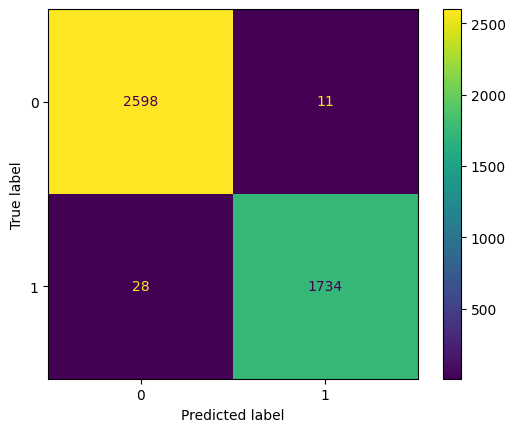

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test2, y_pred_dt, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

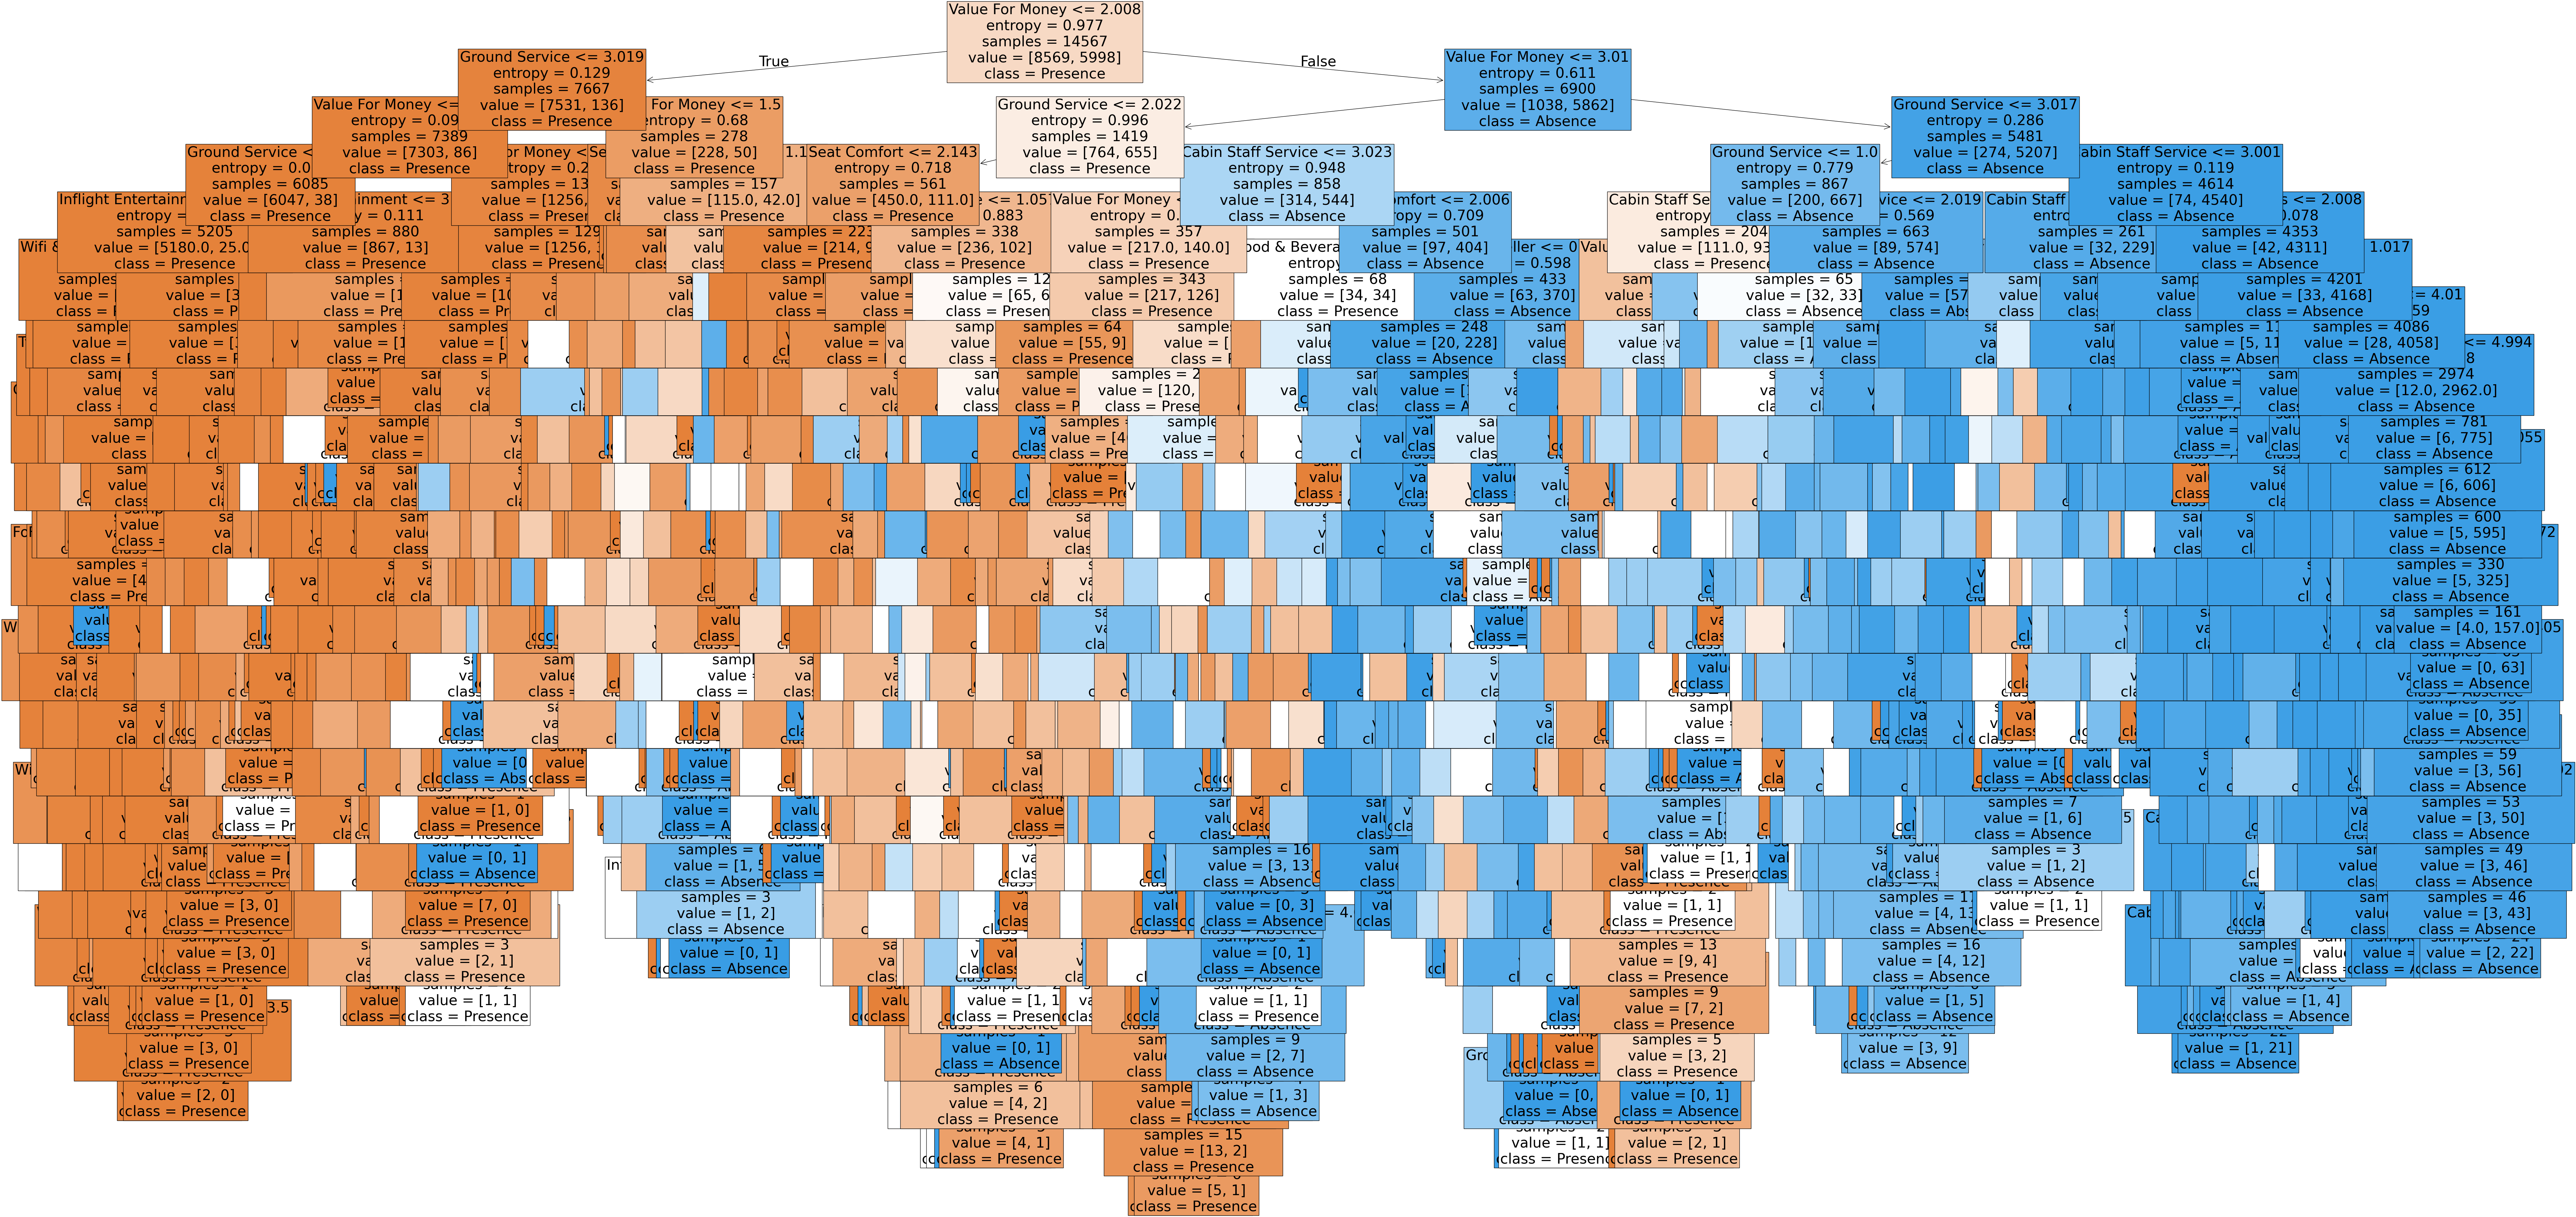

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(96,48), dpi=100)
features = airline_reviews_dt.columns
classes = ['Presence','Absence']

tree.plot_tree(dt_model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=32)
plt.show()

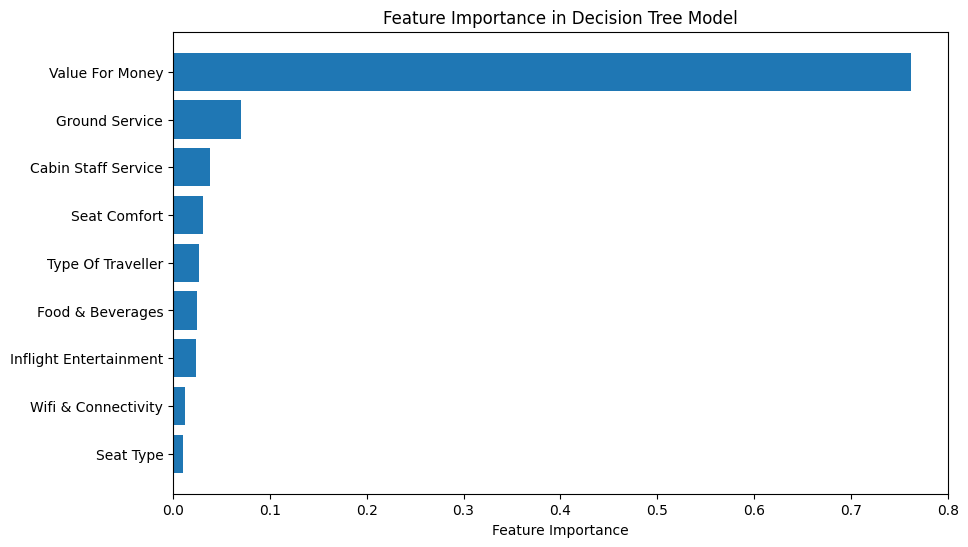

In [ ]:
# plotting feature importance
# Get the feature importances from the Decision Tree model
importances = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': airline_reviews_dt.columns[:-1],  # Exclude the target column
    'Importance': importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

In [ ]:
display(importance_df)

Feature  Importance
8         Value For Money    0.761998
5          Ground Service    0.070709
3     Cabin Staff Service    0.038121
2            Seat Comfort    0.031438
0       Type Of Traveller    0.026639
4        Food & Beverages    0.024653
6  Inflight Entertainment    0.023325
7     Wifi & Connectivity    0.012777
1               Seat Type    0.010340